<a href="https://colab.research.google.com/github/R-Ramana/EE4211-Project/blob/main/EE4211_Group_9_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE4211 Group 9 Question 1

In this project, we will consider the carpark availability dataset provided by the Singapore government’s data.gov.sg [carpark availability data](https://data.gov.sg/dataset/carpark-availability) for use as target data (predicted/output/response variable). We use [this](https://datamall.lta.gov.sg/content/dam/datamall/datasets/LTA_DataMall_API_User_Guide.pdf) User Guide to suplement the information found on the website.

This report presents our interpretition of Question 1: Data Cleaning & Exploring the Data.

## Question 1.1

**1.1 Look at the features in the dataset. What does lot_type mean?**

Lot Type refers to the type of vehicles that the parking lot is meant for. C refers to car lot; H for heavy vehicles; Y for motorcycles.

## Question 1.2

**1.2 Try making an API call for the data from a single specified date & time. Then, do the same thing for the next second of the initially chosen date & time. Notice that “update time” is unchanged. Carry out and document a systematic approach to approximate the frequency at which the data values are updated.**

We first use the sample code provided to make an API call for the data at a specific data and time as shown below.

In [12]:
import requests
import json
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Change these values for different dates
year = "2022"
month = "4"
day = "12"
hour = "12"
minute = "30"
second = "0"

site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
print(site)
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]
print(timestamp)

data = data["items"][0]["carpark_data"]
with open("EE4211data.json", 'w') as fp:
    json.dump(data, fp)
df = pd.read_json("EE4211data.json")
for heading in ("total_lots","lot_type","lots_available"):
    df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
df = df.drop(["carpark_info"], axis=1)
df

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A00
2022-04-12T12:29:27+08:00


,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T12:12:32,105,C,0
1,HLM,2022-04-12T12:12:42,583,C,0
2,RHM,2022-04-12T12:12:32,329,C,106
3,BM29,2022-04-12T12:12:32,97,C,1
4,Q81,2022-04-12T12:12:32,96,C,0
...,...,...,...,...,...
1961,B65M,2022-04-12T12:11:58,679,C,499
1962,B65L,2022-04-12T12:11:58,5,C,0
1963,BE3,2022-04-12T11:30:52,306,C,148
1964,BE3R,2022-04-12T11:30:52,195,C,150


**Next, we make the call for the same date at the next second.**

In [ ]:
second = "1"

site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
print(site)
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]
print(timestamp)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A01
2022-04-12T12:29:27+08:00


**As can be seen above, the update timestamp remains the same as the one seen previously.**

**So, we systematically try to figure out the moment in time when the dataset is updated by repeatedly calling the API for an interval of 90 seconds.**

In [ ]:
minute = 30
second = 27

def print_timestamp(sec_str, min_str):
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{min_str.zfill(2)}%3A{sec_str.zfill(2)}'
    # print(site)
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    timestamp = data["items"][0]["timestamp"]
    print(timestamp)
  
  
for i in range (0, 90): 
    if second == 59:
        second = 0
        minute += 1
    else:
        second += 1

    min_str = str(minute)
    sec_str = str(second)
    print("Min: " + min_str + ", Sec: " + sec_str)
    print_timestamp(sec_str, min_str)


Min: 30, Sec: 28
2022-04-12T12:30:27+08:00
Min: 30, Sec: 29
2022-04-12T12:30:27+08:00
Min: 30, Sec: 30
2022-04-12T12:30:27+08:00
Min: 30, Sec: 31
2022-04-12T12:30:27+08:00
Min: 30, Sec: 32
2022-04-12T12:30:27+08:00
Min: 30, Sec: 33
2022-04-12T12:30:27+08:00
Min: 30, Sec: 34
2022-04-12T12:30:27+08:00
Min: 30, Sec: 35
2022-04-12T12:30:27+08:00
Min: 30, Sec: 36
2022-04-12T12:30:27+08:00
Min: 30, Sec: 37
2022-04-12T12:30:27+08:00
Min: 30, Sec: 38
2022-04-12T12:30:27+08:00
Min: 30, Sec: 39
2022-04-12T12:30:27+08:00
Min: 30, Sec: 40
2022-04-12T12:30:27+08:00
Min: 30, Sec: 41
2022-04-12T12:30:27+08:00
Min: 30, Sec: 42
2022-04-12T12:30:27+08:00
Min: 30, Sec: 43
2022-04-12T12:30:27+08:00
Min: 30, Sec: 44
2022-04-12T12:30:27+08:00
Min: 30, Sec: 45
2022-04-12T12:30:27+08:00
Min: 30, Sec: 46
2022-04-12T12:30:27+08:00
Min: 30, Sec: 47
2022-04-12T12:30:27+08:00
Min: 30, Sec: 48
2022-04-12T12:30:27+08:00
Min: 30, Sec: 49
2022-04-12T12:30:27+08:00
Min: 30, Sec: 50
2022-04-12T12:30:27+08:00
Min: 30, Se

**We note that the data updates approximately every 1 minute.**

## Question 1.3

**(i) How many carparks are included in the data.gov.sg car park database?**

There are 2182 carparks in total included in the data.gov.sg car park database as stated [here](https://data.gov.sg/dataset/hdb-carpark-information?view_id=398e65ae-e2cb-4312-8651-6e65d6f19ed1&resource_id=139a3035-e624-4f56-b63f-89ae28d4ae4c). The number of carparks stored in the API carpark database varies with time. The database has 1966 rows of data on our chosen date and time 2022-04-12T12:12:30. 

**(ii) Does this number vary based on the time? You should notice that it does vary with time.**

As time varies, we can observe that the number of carparks also varies as seen in the number of rows of data in the database. For example, at date and time 2022-04-13T12:12:30, there are only 1964 carparks included in the database as opposed to 1966 rows of data at date and time 2022-04-12T12:12:30. This can be seen with the help of the API call made below.


In [4]:
year = "2022"
month = "4"
day = "13"
hour = "12"
minute = "30"
second = "0"

site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
print(site)
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]
print(timestamp)

data = data["items"][0]["carpark_data"]
with open("EE4211data.json", 'w') as fp:
    json.dump(data, fp)
df = pd.read_json("EE4211data.json")
for heading in ("total_lots","lot_type","lots_available"):
    df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
df = df.drop(["carpark_info"], axis=1)
df

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T12%3A30%3A00
2022-04-13T12:29:27+08:00


,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-13T12:04:44,105,C,17
1,HLM,2022-04-13T12:04:50,583,C,14
2,RHM,2022-04-13T12:04:44,329,C,182
3,BM29,2022-04-13T12:04:50,97,C,5
4,Q81,2022-04-13T12:04:47,96,C,0
...,...,...,...,...,...
1959,B65M,2022-04-13T12:04:37,679,C,504
1960,B65L,2022-04-13T12:04:37,5,C,0
1961,BE3,2022-04-13T09:54:55,306,C,154
1962,BE3R,2022-04-13T09:54:55,195,C,137


**(iii) A carpark may have malfunctioning sensors and nor report its data. Identify one of these carparks with anomalous sensors and a time period where that carpark’s sensors were malfunctioning.**

By observing the latest 'update_datetime' field, we can identify carpark_number TJ37 (index 246) that has an anomalous sensor that has not reported its data since 2019-12-01T08:28:01, which is significantly far from the query-date-time. In addition, for some carparks such as carpark SK24, the data retrieved from the API includes 3 different rows of information for the same carpark showing different number of lots and different types of lots, with carpark SK24 showing it has 181 Y lots in one entry at 2016-02-19T11:19:28 and 181 H lots in another entry at 2016-02-19T11:19:29. The anomalous sensors at this carpark also shows more lots available (200) than total lots (181).

## Question 1.4: Studying data for a one month interval

**Generate hourly readings from the raw data. Select a one month interval and plot the hourly data (time-series) for that interval (aggregate results instead of plotting for each location individually). Identify any patterns in the visualization. Note: You will have to decide what to do if there are no carpark readings for a certain hour, for example, should you impute the missing data or ignore it.**

**_Chosen Interval: February 2022_**

### Retrieving data

We first retrieve data for the month of February 2022 with intervals of 20 minutes. We assume that the lot availabilities woudn't drastically change in a short span of 20 minutes. The data is stored in a .csv file for easier future access.

In [ ]:
# year = "2022"
# month = "2"
# second = 28
# second_str = str(second)

# feb_data = pd.DataFrame()

# for day in range(1, 29):
#     day_str = str(day)
#     for hour in range(0, 24):
#         hour_str = str(hour)
#         for minute in range(0, 60, 20):
#             minute_str = str(minute)
#             site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minute_str.zfill(2)}%3A{second_str.zfill(2)}'
#             print(site)
#             response_API = requests.get(site)
#             data = response_API.text
#             data = json.loads(data)
#             if(not "items" in data):
#                 continue
#             timestamp = data["items"][0]["timestamp"]
#             print(timestamp)

#             data = data["items"][0]["carpark_data"]
#             with open("EE4211data.json", 'w') as fp:
#                 json.dump(data, fp)
#             dt = (pd.read_json("EE4211data.json"))
#             for heading in ("total_lots","lot_type","lots_available"):
#                 dt[heading] = dt["carpark_info"].apply(lambda x: x[0][heading])
#             dt = dt.drop(["carpark_info"], axis=1)
#             feb_data = feb_data.append(dt)

# # only to be run once
# # to replicate the code and store data in a file, uncomment the line below
# # feb_data.to_csv("feb_data_Q1-4", index = False)

# feb_data

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T00%3A00%3A28
2022-02-01T00:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T00%3A20%3A28
2022-02-01T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T00%3A40%3A28
2022-02-01T00:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T01%3A00%3A28
2022-02-01T01:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T01%3A20%3A28
2022-02-01T01:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T01%3A40%3A28
2022-02-01T01:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T02%3A00%3A28
2022-02-01T02:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T02%3A20%3A28
2022-02-01T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-01-31T23:51:30,105,C,56
1,HLM,2022-01-31T23:51:33,583,C,462
2,RHM,2022-01-31T23:51:30,329,C,129
3,BM29,2022-01-31T23:51:33,97,C,50
4,Q81,2022-01-31T23:51:36,96,C,75
...,...,...,...,...,...
1959,B65M,2022-02-28T23:16:31,665,C,380
1960,B65L,2022-02-28T23:16:31,6,C,0
1961,BE3,2022-02-28T22:55:46,306,C,53
1962,BE3R,2022-02-28T22:55:46,195,C,103


### Understanding data

The data is loaded from the csv file and some information on it is collected using pandas _.info()_ function

In [5]:
feb_data_loaded = pd.read_csv("../feb_data_Q1-4.csv")
feb_data_loaded.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,date
0,HE12,2022-02-01 00:23:00,105,C,59,2022-02-01
1,HLM,2022-02-01 00:23:03,583,C,465,2022-02-01
2,RHM,2022-02-01 00:23:00,329,C,125,2022-02-01
3,BM29,2022-02-01 00:23:03,97,C,50,2022-02-01
4,Q81,2022-02-01 00:23:06,96,C,73,2022-02-01


In [7]:
print(feb_data_loaded.info())
feb_data_loaded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677006 entries, 0 to 3677005
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   carpark_number   object
 1   update_datetime  object
 2   total_lots       int64 
 3   lot_type         object
 4   lots_available   int64 
 5   date             object
dtypes: int64(2), object(4)
memory usage: 168.3+ MB
None


,total_lots,lots_available
count,3.677006e+06,3.677006e+06
mean,3.670489e+02,1.926874e+02
std,3.059849e+02,2.280634e+02
min,0.000000e+00,0.000000e+00
25%,1.670000e+02,5.100000e+01
50%,3.150000e+02,1.400000e+02
75%,4.800000e+02,2.600000e+02
max,4.443000e+03,4.060000e+03


### Data cleaning

The data had some stray values from other years and months due to reasons mentioned in [question 1.3](#Question-1.3). These data points were removed and the cleaned data reloaded to the .csv file for easier future access.

In [57]:
# to be run once, only for data cleaning purposes
# updated data stored in a .csv file

# feb_data_loaded["update_datetime"] = pd.to_datetime(feb_data_loaded["update_datetime"])
# feb_data_loaded['date'] = feb_data_loaded['update_datetime'].dt.date
# feb_data_new = feb_data_loaded.loc[feb_data_loaded['date'] >= datetime.date(2022, 2, 1)]
# feb_data_new.groupby('date').groups.keys()                                

**We check the data grouped by date to ensure that we have all required values for the month of February 2022** 

In [15]:
feb_data_loaded.groupby('date').groups.keys() 

dict_keys(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'])

**We remove all duplicate rows to ensure we don't have any duplicate values that will affect our aggregate**

In [16]:
feb_data_loaded.drop_duplicates(inplace = True, ignore_index = True)
feb_data_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405750 entries, 0 to 2405749
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   carpark_number   object
 1   update_datetime  object
 2   total_lots       int64 
 3   lot_type         object
 4   lots_available   int64 
 5   date             object
dtypes: int64(2), object(4)
memory usage: 110.1+ MB


**We check if there are any NaN values for lots available at any time. This is done by generating a boollean dataset representation and then displaying the respective rows with NaN values, if any, while preserving the dataframe structure.**

In [17]:
# creating bool series True for NaN values
bool_series = pd.isnull(feb_data_loaded["lots_available"])
feb_data_loaded[bool_series]

,carpark_number,update_datetime,total_lots,lot_type,lots_available,date


**Since the dataframe generated is empty, we can conclude that there are no NaN values in our data.**

### Data Parsing

Separate columns are added, extracting hour, day and minute from datetime to allow us to study data groups grouped by day and/or hour. A percentage is calculated for finding out the precentage of lots filled for every timestamp.

In [22]:
feb_data_loaded["update_datetime"] = pd.to_datetime(feb_data_loaded["update_datetime"])
feb_data_loaded["minute"] = feb_data_loaded["update_datetime"].dt.minute
feb_data_loaded["hour"] = feb_data_loaded["update_datetime"].dt.hour
feb_data_loaded["day"] = feb_data_loaded["update_datetime"].dt.day
feb_data_loaded["percent_lots_available"] = (feb_data_loaded["lots_available"]/feb_data_loaded["total_lots"]) * 100
feb_data_loaded.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,date,minute,hour,day,percent_lots_filled,percent_lots_available
0,HE12,2022-02-01 00:23:00,105,C,59,2022-02-01,23,0,1,43.809524,56.190476
1,HLM,2022-02-01 00:23:03,583,C,465,2022-02-01,23,0,1,20.240137,79.759863
2,RHM,2022-02-01 00:23:00,329,C,125,2022-02-01,23,0,1,62.006079,37.993921
3,BM29,2022-02-01 00:23:03,97,C,50,2022-02-01,23,0,1,48.453608,51.546392
4,Q81,2022-02-01 00:23:06,96,C,73,2022-02-01,23,0,1,23.958333,76.041667


In [23]:
feb_data_daily = feb_data_loaded.groupby("day", as_index = False)
for day in feb_data_daily.groups.keys():
    day_data = feb_data_daily.get_group(day)
    day_data_hourly = day_data.groupby("hour", as_index = False)
    print(day)
    print(day_data_hourly.groups.keys())

1
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
2
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
3
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
4
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
5
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
6
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
7
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
8
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
9
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
10
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

**As we can see above, we have each hour's data for every day of the month. So we have no missing data for aggregate lot availability.**

### Data Visualisation

We first plot aggregate hourly data for the entire month.

In [24]:
hourly_data = feb_data_loaded.groupby('hour', as_index = False)['percent_lots_available'].mean()
hourly_data

,hour,percent_lots_available
0,0,40.008046
1,1,39.489491
2,2,39.260510
3,3,38.933480
4,4,38.755434
5,5,38.711384
6,6,40.389098
7,7,44.798101
8,8,47.917841
9,9,50.137636


<AxesSubplot:title={'center':'Aggregate Hourly Parking Status For Feb 2022'}, xlabel='hour', ylabel='Lots available (percentage)'>

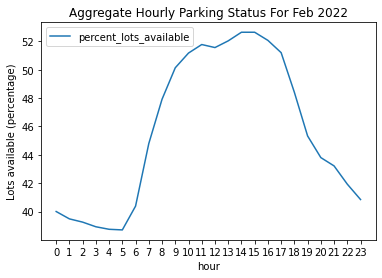

In [25]:
hourly_data.plot(y = "percent_lots_available", xlabel = 'hour', ylabel = 'Lots available (percentage)', xticks = hourly_data["hour"], \
                title = "Aggregate Hourly Parking Status For Feb 2022")

<p id="explanation"></p>
<br>
<p><b>On average, the parking lot availability follows the above trend. As can be seen, the availability increases during the start of the day (around 5AM - 9AM). There is a slight dip in availability during the hours around lunch/noon (11AM - 12PM). After 12PM, lot availability increases for a short while (till around 3PM). From 3PM onwards, there is a gradual decrease in availability till 5AM.</b><p>

We can now plot hourly data for each day of the month

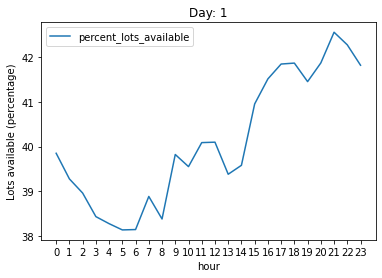

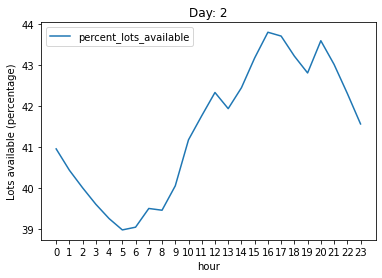

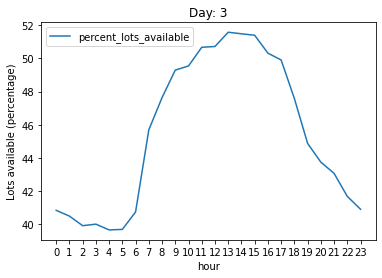

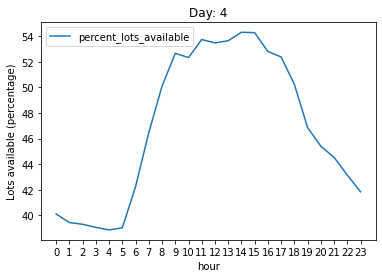

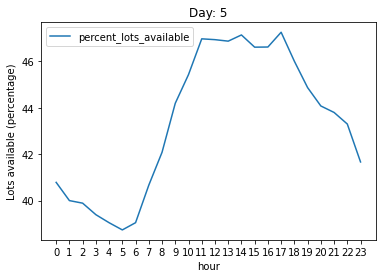

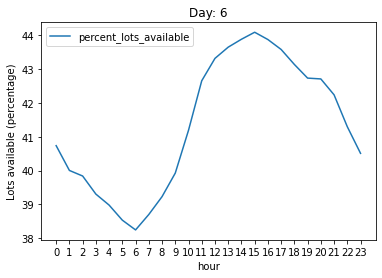

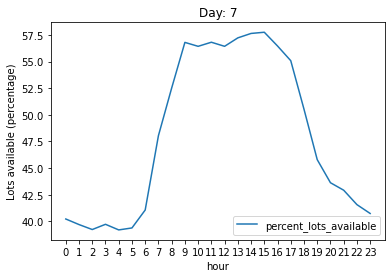

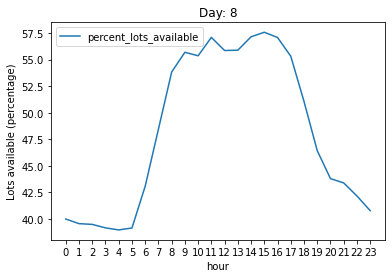

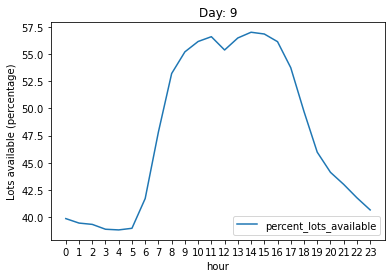

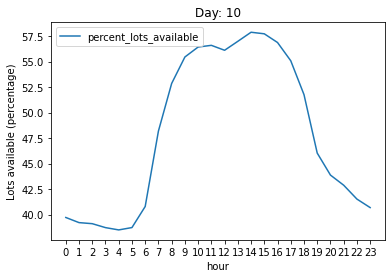

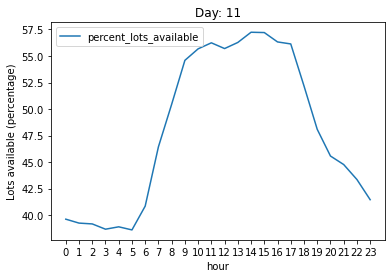

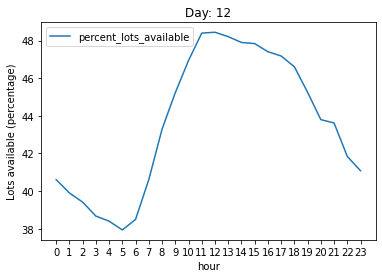

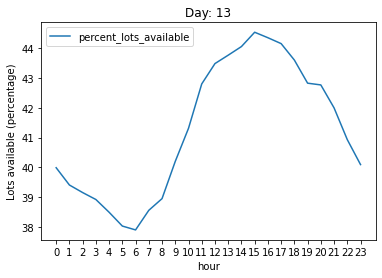

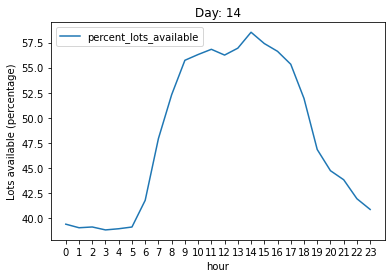

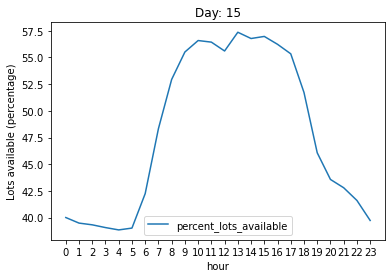

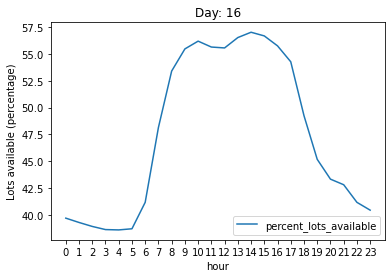

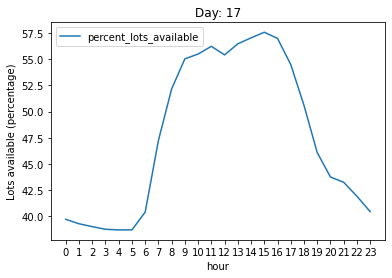

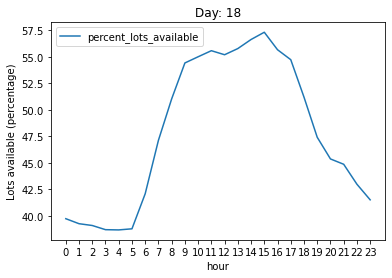

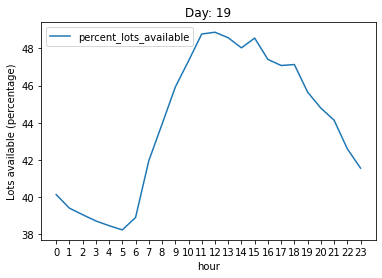

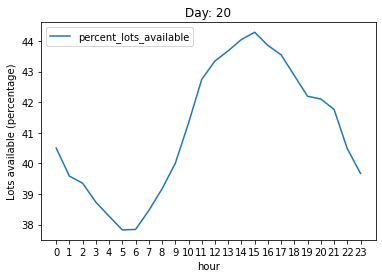

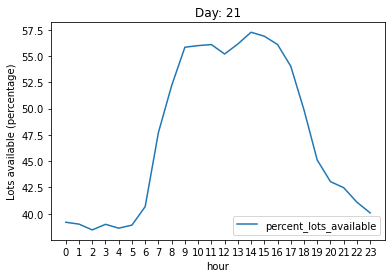

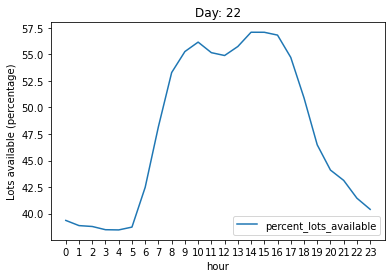

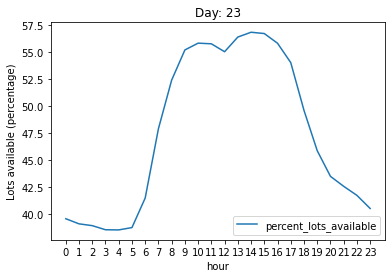

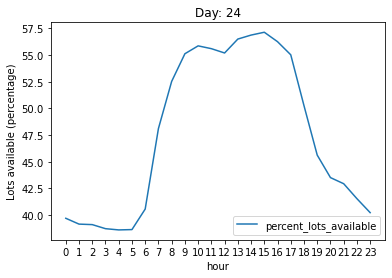

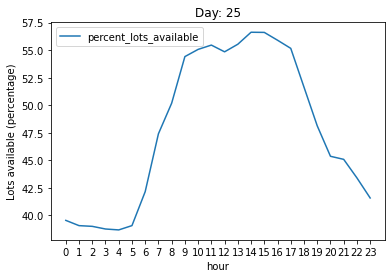

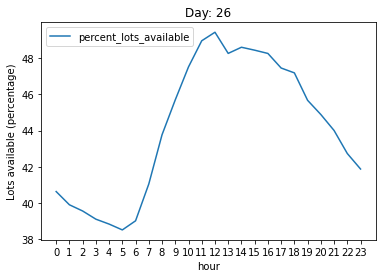

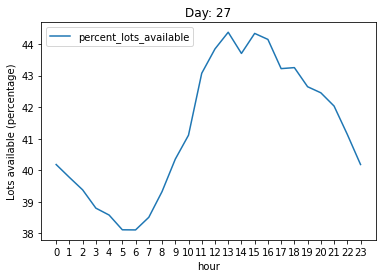

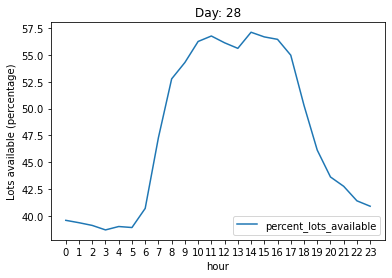

In [26]:
for day in feb_data_daily.groups.keys():
    day_data = feb_data_daily.get_group(day)
    hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
    title = "Day: " + str(day)
    hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])

**From the above visualisations, it is clear that the pattern in general (for days 3-28) follows the bell curve-esque trend as seen with the aggregate hourly data plot explained [above](#explanation). However, there is an anomaly for days 1 and 2 which can be attributed to Chinese New Year Holidays** 

## Q1.5: Correlation between carpark availability

**Intuitively, we expect that carpark availability across certain carparks to be correlated. For example, many housing carparks would experience higher carpark availability during working hours. Using the same interval chosen in 1.4, write a function to find the top five carparks with which it shows the highest correlation. Demonstrate an example of this
function call using a randomly selected carpark.**


**_Chosen Interval: February 2022_**

In [28]:
feb_data_carpark = feb_data_loaded.groupby("carpark_number", as_index = False)
for cp in feb_data_carpark.groups.keys():
    cp_data = feb_data_carpark.get_group(cp)
    cp_data_hourly = cp_data.groupby("day", as_index = False)
    print(cp)
    print(cp_data_hourly.groups.keys())


A10
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
A100
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
A11
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
A12
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
A13
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
A15
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
A2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
A20
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
A21
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

AR7M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
AR9
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
AV1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
B10
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
B10M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
B11
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
B16
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
B17
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
B19
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

BBM5
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BBM7
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BBM8
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BBM9
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BE10
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BE11
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BE12
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BE13
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BE14
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 

BJ39
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BJ4
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BJ40
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BJ41
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BJ42
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BJ43
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BJ44
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BJ45
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BJ48
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BRB1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BRBL
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BRM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BRM1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BRM3
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BRM4
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BRM5
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
BRM6
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
CK33
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
CK34
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
CK35
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
CK36
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
CK37
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
CK38
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
CK39
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
CK3A
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
EC8
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
ECM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
EI3
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
EPL
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
EPM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
FR2C
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
FR3M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
FR4M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HG32
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HG33
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HG34
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HG35
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HG36
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HG37
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HG38
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HG39
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10

HR5
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HRM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
HVM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J10
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J11
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J12
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J14
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J15
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J73
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J74
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J74M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J75M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J76M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J77M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J78M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
J79M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

K10
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
K19
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
K2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
K2T
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
K52
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
K7
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
KAM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
KAML
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
KAS
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,

MP12
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
MP13
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
MP14
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
MP15
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
MP16
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
MP17
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
MP19
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
MP1M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
MP2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PL33
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PL34
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PL35
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PL36
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PL37
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PL38
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PL39
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PL40
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PM5
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PM6
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PM7
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PM8
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PM9
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PP1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PP2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
PP3
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13

S39L
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
S40L
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SAM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SAM2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SB1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SB10
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SB11
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SB12
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SB13
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9,

SE25
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SE26
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SE27
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SE28
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SE29
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SE31
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SE32
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SE33
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SE34
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SK36
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SK38
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SK39
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SK4
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SK40
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SK41
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SK43
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
SK44
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
T1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
T11
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
T12
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
T13
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
T15
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
T16
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
T17
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
T18
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TB8
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TB9
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TBC2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TBC3
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TBCM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TBL
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TBM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TBM2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TM42
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TM43
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TM44
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TM45
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TM46
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TM47
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TM48
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TM50
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10

TPMN
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TPMP
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TPMQ
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TPMR
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TR1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TRM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TW1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TW2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
TW3
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
UA5
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
UAM1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
UBK2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
UBK4
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
UBK5
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
UBKM
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
UBM1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
UBM2
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

W7
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
W70
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
W71
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
W717
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
W72
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
W73
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
W74
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
W75
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
W76
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
Y38
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
Y39
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
Y3M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
Y4
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
Y40
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
Y41
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
Y41M
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
Y43
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

**We have each day's data for every day of the month sorted by carpark_number. 
Some carparks have no data available for certain days, as shown in the screenshot below:**
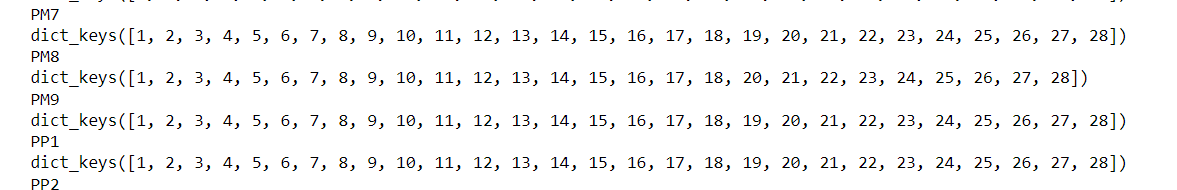

A new dataframe called **cp_hourly** is created to store the hourly data on **percent_lots_available** aggregated over the entire month for each carpark.

In [29]:
cp_hourly = pd.DataFrame()
for cp in feb_data_carpark.groups.keys():
    cp_data = feb_data_carpark.get_group(cp)
    hourly_data_cp = cp_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
    cp_hourly[cp] = hourly_data_cp['percent_lots_available']

cp_hourly

,A10,A100,A11,A12,A13,A15,A2,A20,A21,A24,...,Y73M,Y74M,Y76M,Y77L,Y77M,Y78M,Y8,Y82M,Y9,YHS
0,32.060185,49.074074,34.264766,41.297745,33.725230,53.981452,39.834515,2.788934,48.978995,61.907234,...,42.614173,55.240106,28.251781,66.981132,43.985013,29.865479,38.586004,43.542956,46.338705,35.224736
1,30.050223,47.544643,34.375000,41.193380,33.309404,55.841404,38.421353,2.519168,48.411758,64.719626,...,42.067398,54.433660,27.277740,69.642857,42.553191,28.174603,38.113995,42.260730,46.252602,34.174143
2,27.505896,46.816038,33.740942,41.300813,33.035548,55.492781,37.480299,3.439211,47.897106,65.111973,...,41.620492,53.879605,26.405384,71.296296,41.563786,27.443416,37.956321,41.473879,46.048912,34.765625
3,24.748884,45.596591,33.488142,41.206208,33.184102,53.004622,37.568952,2.989737,47.542880,65.203605,...,41.737056,53.422883,26.227597,69.090909,42.209327,27.895623,37.315769,41.306318,45.669674,33.991745
4,23.958333,44.791667,32.767637,41.132075,32.378876,44.483531,37.990998,1.817798,47.226610,64.442714,...,41.554004,53.198586,26.070004,76.415094,42.191891,27.419637,37.363834,41.028565,45.638960,34.237520
5,23.011364,45.170455,30.629614,41.380580,32.454726,26.223217,39.130871,1.227131,47.686342,59.889550,...,42.111403,53.537575,26.238233,65.094340,42.602257,27.917540,37.832268,41.786190,46.773074,34.151786
6,26.477273,49.289773,29.206522,43.567671,36.387821,8.983051,42.392613,0.583584,50.357604,55.191164,...,44.570210,55.065963,28.307601,58.333333,44.345942,31.899929,40.845973,44.344365,49.945474,33.623904
7,33.333333,53.298611,27.680094,47.453659,43.075377,4.619475,48.835809,0.114745,55.388801,39.174455,...,51.291055,60.151180,37.189446,59.375000,49.005122,40.315571,46.780319,51.451900,53.741955,34.849011
8,35.995370,57.523148,24.771739,51.941463,42.251256,2.711864,53.518822,0.556070,59.063250,28.020076,...,56.830396,64.939063,46.595408,56.122449,52.819993,50.272331,50.417606,57.792208,55.370774,34.317130
9,42.482311,63.620283,25.627090,54.710665,40.181299,4.204694,57.551106,0.018255,62.183672,28.152001,...,60.733687,68.871571,52.223388,59.183673,55.280552,56.499288,53.280292,62.905892,57.702984,33.522727


### Data Analysis
A new dataframe called **cp_corr** is created to store the absolute correlation values between every pair of carparks.
The absolute value is found because correlation could be in the positive or negative direction. 
Example:
1. HDB Carparks in the residential zones of Singapore would likely be highly positively correlated with each other 
    - a large number of lots would be filled before and after work hours for the day
2. Carparks in the Central Business District would likely be negatively correlated with HDB carparks in residentials zones
    - CBD carparks would be filled during the day's working hours and empty at night whereas HDB carparks would follow the opposite trend
_________________________________
**The correlation matrix for all carparks is generated here so that it only needs to be generated once and not every time when trying to find the correlations with a single carpark, as asked in the question.**

In [30]:
cp_corr = cp_hourly.corr().abs()

#### The carpark_corr_generator function
The function defined below takes in a random carpark from all the carparks reporting data for the chosen time interval. In our case, 1851 carparks reported parking availability for February 2022. 

- The pandas DataFrame.sample() function helps select a random carpark from our list of 1851 carparks.  A random_state =  1 was assigned to ensure reproducability of results.

- In order to find the correlation between a main carpark (**main_cp**) and all other caraparks, all we need to do is extract the column corresponding to the **main_cp** from our previously generated correlation matrix. 

- The pandas dataFrame.sort_values() function is used to sort the correlations between carparks in descending order. 

The randomly chosen carpark is:  CK75
The top 5 highly correlated carparks with  CK75  are:
BBM3    0.999693
JM19    0.999599
BJ29    0.999596
TM4     0.999525
W59     0.999472
Name: CK75, dtype: float64


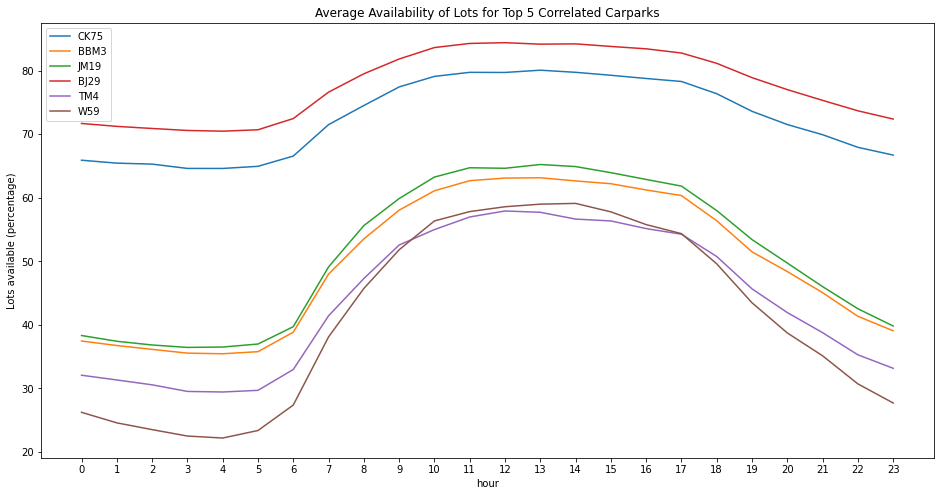

In [38]:
import numpy as np
def carpark_corr_generator():
    chosen_cp = cp_corr.sample(axis='columns', random_state=1).columns.tolist()

    main_cp = cp_corr.loc[chosen_cp[0]]
    main_cp_corr_sorted = main_cp.sort_values(kind="quicksort", ascending = False)
    print('The randomly chosen carpark is: ', chosen_cp[0])
    print('The top 5 highly correlated carparks with ', chosen_cp[0], ' are:')
    print(main_cp_corr_sorted.iloc[1:6])

    top_5_cp = main_cp_corr_sorted.iloc[0:6].to_dict()
    for cp in top_5_cp.keys():
        hourly_data_cp = cp_hourly[cp]
        title = "Carpark Number: " + str(cp)
        hourly_data_cp.plot(title = "Average Availability of Lots for Top 5 Correlated Carparks", y = "percent_lots_available", \
                            xlabel = 'hour', ylabel = 'Lots available (percentage)',\
                            xticks = np.arange(0, 24, 1), legend = True, figsize=(16, 8))

carpark_corr_generator()


### Conclusion

As can be seen in the above generated graph, all the 6 carparks (1 main cp + 5 top correlated cp) follow similar trends for percent_lots_available. Even though they follow similar trends, the percentage of lots available differs from carpark to carpark.

The table below summarises the carpark information. We see that all are multi-storey carparks serving HDB residents.
    
<table>
  <tr>
    <th>Carpark_Number</th>
    <th>Address</th>
    <th>Carpark_Type</th>
  </tr>
  <tr>
    <td>CK75</td>
    <td>BLK 809 CHOA CHU KANG AVENUE 1</td>
    <td>Multi-Storey Carpark</td>
  </tr>
  <tr>
      <td>BBM3</td>
      <td>BLK 289H BUKIT BATOK STREET 25</td>
      <td>Multi-Storey Carpark</td>
      
  </tr>
  <tr>
      <td>JM19</td>
      <td>BLK 273 JURONG WEST AVENUE 3</td>
      <td>Multi-Storey Carpark</td>
      
  </tr>
  <tr>
      <td>BJ29</td>
      <td>BLK 505A JELAPANG ROAD</td>
      <td>Multi-Storey Carpark</td>
      
  </tr>
      <td>TM4</td>
      <td>BLK 494A TAMPINES STREET 43</td>
      <td>Multi-Storey Carpark</td>
      
  </tr>
  <tr>
      <td>W59</td>
      <td>BLK 897D WOODLANDS DRIVE 50</td>
      <td>Multi-Storey Carpark</td>
      
  </tr>
</table>

## Q1.6: Project Proposal 

**Group Project Proposal for Question 3:** Please include a short proposal (around 500
words) of what your team intends to do for the Group Proposed Project in Question
3. For the group project proposal, you may use additional datasets to supplement your
analysis or look at unaggregated data, etc. See Question 3 below for more information
about this. Please use markdown in the iPython notebook to present your proposal.
________


**We propose a multi-pronged approach wherein we will be tackling the given problem from the perspective of 2 different stakeholders: vehicle drivers and the Urban Redevelopment Authority (URA)/Land Transport Authority (LTA). Our approach allows us to analyse data in the short term as well as the long term.**

### Short-term analytics

#### Recommendation system:

Our main idea is to design a recommendation system that utilises the user's current and intended final destination (GPS coordinates) to suggest the best carparks with availability according to certain user preferences and environmental parameters. If no user input is provided, the system defaults to suggesting the closest carpark with availability. For the scope of this project's implementation, we will be simulating user inputs and potential use-cases by randomly selecting from a pre-defined set of parameters.  

The table below highlights the parameters that will be considered by the recommendation system.




<table>
  <tr>
    <th style="text-align:center;">Data Attribute</th>
    <th style="text-align:center;">Source</th>
    <th style="text-align:center;">Remarks</th>
  </tr>
  <tr>
    <td style="text-align:left;">Geo-coordinates of current/final destination</td>
    <td style="text-align:left;">User Input</td>
    <td style="text-align:left;">To provide best carpark recommendations based on estimated time of arrrival and carparks near destination</td>
  </tr>
  <tr>
    <td style="text-align:left;">Geo-coordinates of carparks</td>
    <td style="text-align:left;" rowspan="3"><a href"https://data.gov.sg/dataset/hdb-carpark-information">Carpark Info Dataset</a></td>
    <td style="text-align:left;">To recommend carparks based on distance from destination</td>
  </tr>
  <tr>
      <td style="text-align:left;">Cost of parking</td>
      <td style="text-align:left;">To recommend carparks based on cost</td>
      
  </tr>
  <tr>
      <td style="text-align:left;">Carpark opening hours</td>
      <td style="text-align:left;">To recommend carparks that are open during user's time of arrival</td>
      
  </tr>
  <tr>
      <td style="text-align:left;">Carpark availability</td>
      <td style="text-align:left;"><a href"https://data.gov.sg/dataset/carpark-availability">Carpark Availability Dataset</a></td>
      <td style="text-align:left;">To recommend carparks based on availability</td>
  <tr>
      <td colspan="3" style="text-align:center; font-size:12px; text-transform:uppercase;"><b>If time permits...</b></td>
      
      
  </tr>
  <tr>
      <td style="text-align:left;">Weather forecast</td>
      <td style="text-align:left;"><a href"https://www.programmableweb.com/api/nea-datasets">NEA Weather API</a></td>
      <td style="text-align:left;">To recommend carparks based on current weather conditions</td>
      
  </tr>
  <tr>
      <td style="text-align:left;">Traffic Conditions</td>
      <td style="text-align:left;"><a href"https://datamall.lta.gov.sg/content/datamall/en/dynamic-data.html">Estimated Travel Times API</td>
      <td style="text-align:left;">To improve our time-of-arrival estimation</td>
      
  </tr>

</table>


**If time permits, we intend on supplementing our current data sources with Real-time Traffic Data and Weather forecasting insights to improve our reccomendations.**

### Long-term analytics

#### From a urban developer/Singapore Land Transport Authority's point of view:

We believe long-term analysis of this data will be beneficial from an urban developer's perspective, specifically for the LTA and URA. By looking at the usage of carparks trends through historical data analysis, we can forecast the availability of carparks in the long-term. Developers can identify hotspots where there may often be high usage of car parks and thus an excellent location to build more lots or carparks to cater to the high demand. In contrast, this long-term analysis can also identify potential spots where space can be saved by reducing the number of lots or carparks that don't have high usage forecasted.

**If time permits, with the additional data on upcoming HDB developments, we can take in the geo-coordinates of existing carparks as well as carpark availability, to predict if more carparks need to be built around these upcoming HDB developments.**
